## Imports

In [1]:
import pathlib # Python library
import numpy as np # NumPy Library
from PIL import Image # Python Imaging Library
from image_utils import resize_file_and_transform_to_array, show_image # Utilities

In [2]:
# See all elements from a NumPy array
#import sys
#np.set_printoptions(threshold=sys.maxsize)

## Dataset exploration

The original dataset can be found at [TensorFlow website](https://www.tensorflow.org/datasets/catalog/horses_or_humans)
<br/>
For convenience, I reorganized the dataset creating the following structure:

```
dataset
│      
└───training
│   │   
│   └─── horses
│   │  
│   └─── humans
│   
└───validation
    │   
    └─── horses
    │  
    └─── humans
    
```

#### Retrieving the training dataset

In [3]:
training_directory = '../dataset/training'
training_data_dir = pathlib.Path(training_directory)

horses_training_directory = list(training_data_dir.glob('horses/*'))
humans_training_directory = list(training_data_dir.glob('humans/*')) 

#### Retrieving the validation dataset

In [4]:
validation_directory = '../dataset/validation'
validation_data_dir = pathlib.Path(validation_directory)

horses_validation_directory = list(validation_data_dir.glob('horses/*'))
humans_validation_directory = list(validation_data_dir.glob('humans/*'))

Let's see some examples from our dataset

### A horse from training dataset

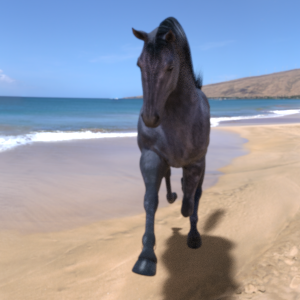

In [5]:
# Image.open method from PIL
first_horse_picture_1 = show_image(str(horses_training_directory[0]))
first_horse_picture_1

### A human from training dataset

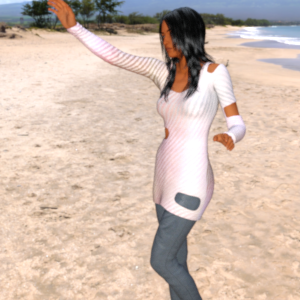

In [6]:
first_human_picture_1 = show_image(str(humans_training_directory[0]))
first_human_picture_1

### A horse from validation dataset

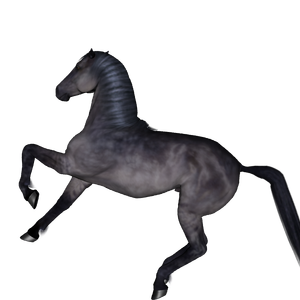

In [7]:
first_horse_picture_2 = show_image(str(horses_validation_directory[0]))
first_horse_picture_2

### A human from validation dataset

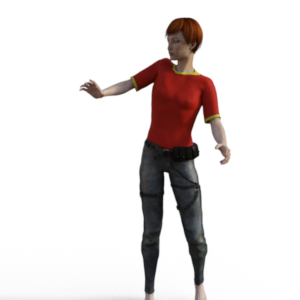

In [8]:
first_human_picture_2 = show_image(str(humans_validation_directory[0]))
first_human_picture_2

Dataset is composed by ***80%*** of training samples (In which there are 50% of horses and 50% of humans) and ***20%*** of validation samples (In which there are 50% of horses and 50% of humans)

### Training dataset size

In [9]:
horses_training_directory_len = len(horses_training_directory)
humans_training_directory_len = len(humans_training_directory)

print("Folder with horses contains {} pictures".format(horses_training_directory_len))
print("Folder with humans contains {} pictures".format(humans_training_directory_len))
print("Training dataset contains {} pictures".format(horses_training_directory_len + humans_training_directory_len))

Folder with horses contains 400 pictures
Folder with humans contains 400 pictures
Training dataset contains 800 pictures


### Validation dataset size

In [10]:
horses_validation_directory_len = len(horses_validation_directory)
humans_validation_directory_len = len(humans_validation_directory)

print("Folder with horses contains {} pictures".format(horses_validation_directory_len))
print("Folder with humans contains {} pictures".format(humans_validation_directory_len))
print("Validation dataset contains {} pictures".format(horses_validation_directory_len + humans_validation_directory_len))

Folder with horses contains 100 pictures
Folder with humans contains 100 pictures
Validation dataset contains 200 pictures


### Matrix shape

Each image is 300 pixels width, 300 pixels height and has 3 channels: RGB (Red, Green and Blue)

In [11]:
first_horse_picture_1 = first_horse_picture_1.convert("RGB")
## This is the key routine that allows to convert from image to array. 
img_matrix = np.array(first_horse_picture_1)
img_shape = img_matrix.shape
img_shape

(300, 300, 3)

When reshaping the matrix to a feature array, we are going to obtain an array of **270.000 features** (300 x 300 x 3), which is quite big.
<br/>
<br/>
For this example, in which I only want to show how a Neural Network works, we can reduce the complexity of the dataset by reducing the size of each image.
<br/>
<br/>
As follows we can see how we represent a RGB image.

### RGB image representation

Consider the following example to understand how a RGB image is composed:

![RGB Matrix](../files/RGB_matrix.png "RGB Matrix")


### Reshaping the matrix to a feature array

For each image, we are going to obtain an array of 12.288 features (64 * 64 * 3). The representation (features x samples) will be very useful afterwards to be used in a neural network.

In [12]:
img_matrix = resize_file_and_transform_to_array(str(horses_training_directory[0]))
img_matrix = img_matrix.reshape(img_matrix.shape[0] * img_matrix.shape[1] * img_matrix.shape[2], 1)
img_matrix = img_matrix / 255 # Let's standardize the array
img_matrix

array([[0.43137255],
       [0.60784314],
       [0.87843137],
       ...,
       [0.78039216],
       [0.67843137],
       [0.58431373]])

In [13]:
img_matrix_shape = img_matrix.shape
print("The size of the feature array for a sample is {}".format(img_matrix_shape))

The size of the feature array for a sample is (12288, 1)


### Creating the dataset

Say we would like to share the dataset from horses and humans with someone else, so we could create a CSV file. In this case, we are going to create a dataset with representation (samples x features) which is more readable, as follows:

![Samples Features Matrix](../files/samples_features_matrix.png "Samples Features Matrix")

In [14]:
# Given a directory with images, creates a matrix of shape samples x features, that can be used as input in a neural network.
def create_dataset_for_a_label(directory, dataset_shape, img_shape, label):
    
    # Initialization of Xs (samples * features)
    array_of_xs = np.zeros(dataset_shape)
    
    for elem in range(len(directory)):
        
        # Routine to convert from a RGB image to a 3 dimensions array (width * height * RGB values)
        img_matrix = resize_file_and_transform_to_array(str(directory[elem]))

        # Each sample is represented into an array of 1 row * 12.228 columns. Afterwards, we standardize the values.
        img_matrix = img_matrix.reshape(1, img_matrix.shape[0] * img_matrix.shape[1] * img_matrix.shape[2]) / 255
        
        # Add the img_matrix array to the row 
        array_of_xs[elem] = img_matrix
    
    # Initialization of Ys (samples * 1) with the label received as parameter
    array_of_ys = np.full((len(directory), 1), label, dtype=int)
    
    # Append both arrays as columns
    return np.append(array_of_xs, array_of_ys, axis = 1)

### Labels for target values
We know our dataset is composed by two classes: horses and humans. A common thing is to assign 1 for a class and 0 for another class.

In [15]:
# Labels for horses and humans
label_horses = 1
label_humans = 0

### Let us get the numbers from the images!

#### Training dataset

In [16]:
# Samples x features shape
horses_training_dataset_shape = (horses_training_directory_len, img_matrix_shape[0])

# Samples x features shape
humans_training_dataset_shape = (humans_training_directory_len, img_matrix_shape[0])

# Call the function
training_horses = create_dataset_for_a_label(horses_training_directory, 
                                             horses_training_dataset_shape, 
                                             img_shape, 
                                             label_horses)

# Call the function
training_humans = create_dataset_for_a_label(humans_training_directory, 
                                             humans_training_dataset_shape, 
                                             img_shape, 
                                             label_humans)

# Putting it all together
training_dataset = np.append(training_horses, training_humans, axis = 0)

# Let's shuffle the data
np.random.shuffle(training_dataset)

print("Shape of training dataset is {} which corresponds to 800 training samples * (12.228 features + 1 target value)".format(training_dataset.shape))

Shape of training dataset is (800, 12289) which corresponds to 800 training samples * (12.228 features + 1 target value)


#### Validation dataset

In [17]:
# Samples x features shape
horses_validation_dataset_shape = (horses_validation_directory_len, img_matrix_shape[0])

# Samples x features shape
humans_validation_dataset_shape = (humans_validation_directory_len, img_matrix_shape[0])

# Call the function
validation_horses = create_dataset_for_a_label(horses_validation_directory, 
                                               horses_validation_dataset_shape, 
                                               img_shape, 
                                               label_horses)

# Call the function
validation_humans = create_dataset_for_a_label(humans_validation_directory, 
                                               humans_validation_dataset_shape, 
                                               img_shape, 
                                               label_humans)

# Putting it all together
validation_dataset = np.append(validation_horses, validation_humans, axis = 0)

# Let's shuffle the data
np.random.shuffle(validation_dataset)

print("Shape of validation dataset is {} which corresponds to 200 samples * (12.228 features + 1 target value)".format(validation_dataset.shape))

Shape of validation dataset is (200, 12289) which corresponds to 200 samples * (12.228 features + 1 target value)


### Save the datasets

In [18]:
np.savetxt('../dataset/training_dataset.csv', training_dataset, fmt = '%f', delimiter = ',')
np.savetxt('../dataset/validation_dataset.csv', validation_dataset, fmt = '%f', delimiter = ',')